In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [2]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 14.1 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import yfinance as yf 

In [4]:
dataset=yf.download("RELIANCE.NS",start="2016-11-01",end="2021-11-01",interval="1d")
dataset

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-01,520.714172,523.017334,518.782471,520.565552,507.237732,4718327
2016-11-02,515.612488,516.528809,505.706421,507.068512,494.086273,3248957
2016-11-03,507.118042,512.516846,505.508301,507.167572,494.182739,3374427
2016-11-04,505.334930,508.628723,495.304993,498.053955,485.302490,5323812
2016-11-07,502.239258,503.502289,494.834473,495.874603,483.178925,4387036
...,...,...,...,...,...,...
2021-10-25,2680.000000,2680.000000,2570.000000,2601.800049,2601.800049,7937067
2021-10-26,2617.100098,2668.899902,2603.149902,2661.050049,2661.050049,4499706
2021-10-27,2652.000000,2676.800049,2619.949951,2627.399902,2627.399902,4567140


In [5]:
dataset_training=dataset.iloc[:int(len(dataset)*0.75), ]
dataset_testing=dataset.iloc[int(len(dataset)*0.75):, ]
print('Training dataset shape',dataset_training.shape)
print('Testing dataset shape',dataset_testing.shape)

Training dataset shape (925, 6)
Testing dataset shape (309, 6)


In [6]:
training_set=dataset_training.iloc[:, 0:1].values
training_set

array([[ 520.71417236],
       [ 515.61248779],
       [ 507.11804199],
       [ 505.33493042],
       [ 502.23925781],
       [ 498.12823486],
       [ 470.5397644 ],
       [ 504.51766968],
       [ 494.2401123 ],
       [ 493.57144165],
       [ 492.82849121],
       [ 488.37072754],
       [ 487.87542725],
       [ 489.13845825],
       [ 494.165802  ],
       [ 497.78152466],
       [ 498.05395508],
       [ 490.35195923],
       [ 491.83786011],
       [ 489.85665894],
       [ 495.28024292],
       [ 495.30499268],
       [ 493.27426147],
       [ 492.82849121],
       [ 493.3237915 ],
       [ 497.28622437],
       [ 497.80630493],
       [ 506.20172119],
       [ 505.45877075],
       [ 509.17355347],
       [ 515.01812744],
       [ 521.25897217],
       [ 521.06085205],
       [ 522.54675293],
       [ 522.39819336],
       [ 525.07281494],
       [ 524.03271484],
       [ 521.06085205],
       [ 522.22485352],
       [ 519.00537109],
       [ 528.93621826],
       [ 520.070

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
training_set_scaled=scaler.fit_transform(training_set)
training_set_scaled

array([[0.02937164],
       [0.02638516],
       [0.02141259],
       [0.02036877],
       [0.01855659],
       [0.01615004],
       [0.        ],
       [0.01989036],
       [0.01387397],
       [0.01348253],
       [0.01304762],
       [0.01043808],
       [0.01014814],
       [0.01088751],
       [0.01383047],
       [0.01594708],
       [0.01610656],
       [0.01159788],
       [0.01246771],
       [0.01130793],
       [0.01448285],
       [0.01449734],
       [0.01330857],
       [0.01304762],
       [0.01333756],
       [0.01565713],
       [0.01596158],
       [0.02087618],
       [0.02044127],
       [0.02261587],
       [0.02603723],
       [0.02969056],
       [0.02957458],
       [0.03044442],
       [0.03035745],
       [0.03192315],
       [0.03131429],
       [0.02957458],
       [0.03025598],
       [0.02837132],
       [0.03418475],
       [0.0289947 ],
       [0.03328591],
       [0.03885291],
       [0.04054909],
       [0.04143343],
       [0.0350836 ],
       [0.036

In [8]:

x_train=[]
y_train=[]
for i in range(60,len(dataset_training)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i, 0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [9]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
regressor=Sequential([
    LSTM(60,return_sequences=True,input_shape=(x_train.shape[1],1)),
    Dropout(0.3),
    LSTM(60,return_sequences=True),
    Dropout(0.3),
    LSTM(60,return_sequences=True),
    Dropout(0.3),
    LSTM(60,return_sequences=True),
    Dropout(0.3),
    LSTM(60,return_sequences=False),
    Dropout(0.3),
    Dense(1)
])
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=100,batch_size=64)

Epoch 1/100
14/14 [==============================] - 11s 199ms/step - loss: 0.0430
Epoch 2/100
14/14 [==============================] - 3s 195ms/step - loss: 0.0108
Epoch 3/100
14/14 [==============================] - 3s 197ms/step - loss: 0.0074
Epoch 4/100
14/14 [==============================] - 3s 196ms/step - loss: 0.0069
Epoch 5/100
14/14 [==============================] - 3s 195ms/step - loss: 0.0058
Epoch 6/100
14/14 [==============================] - 3s 191ms/step - loss: 0.0058
Epoch 7/100
14/14 [==============================] - 3s 195ms/step - loss: 0.0066
Epoch 8/100
14/14 [==============================] - 3s 193ms/step - loss: 0.0067
Epoch 9/100
14/14 [==============================] - 3s 195ms/step - loss: 0.0056
Epoch 10/100
14/14 [==============================] - 3s 195ms/step - loss: 0.0060
Epoch 11/100
14/14 [==============================] - 3s 196ms/step - loss: 0.0063
Epoch 12/100
14/14 [==============================] - 3s 193ms/step - loss: 0.0047
Epoch 13/100

In [16]:
dataset_total =pd.concat((dataset_training['Open'],dataset_testing['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_testing)-60:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)
x_test=[]
for i in range(60,369):
    x_test.append(inputs[i-60:i, 0])
x_test=np.array(x_test)

In [20]:
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [21]:
predicted_stock_price=regressor.predict(x_test)

In [22]:
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)
dataset_testing['Predicted']=predicted_stock_price
final_visualization=pd.concat([dataset['Open'],dataset_testing['Open'],dataset_testing['Predicted']],axis=1)

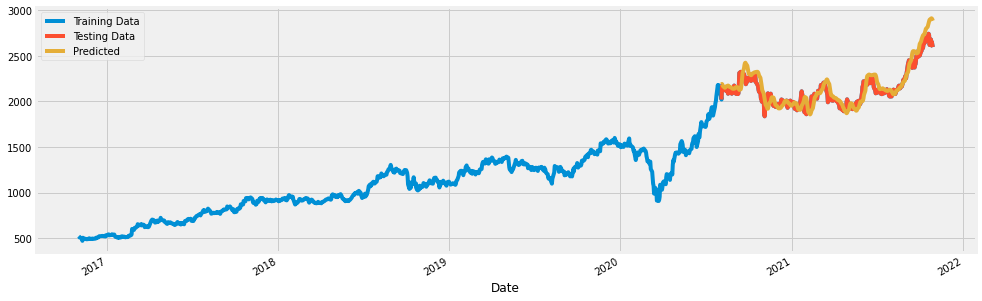

In [25]:
final_visualization.columns=['Training Data','Testing Data','Predicted']
final_visualization.plot(figsize=(15,5))

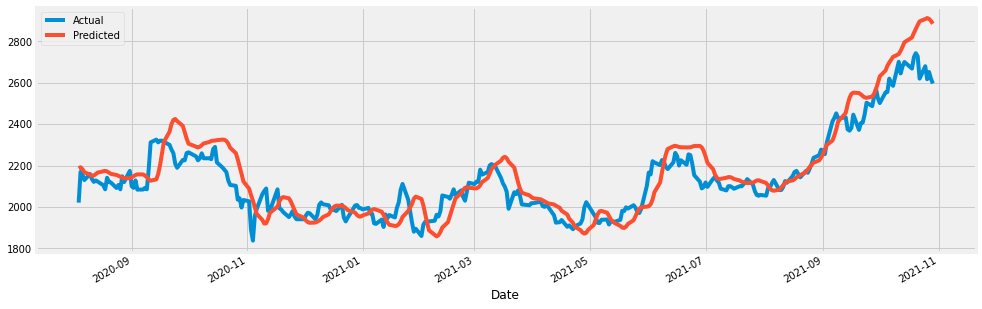

In [24]:
plt.figure(figsize=(15,5))
dataset_testing['Open'].plot(label='Actual')
dataset_testing['Predicted'].plot(label='Predicted')
plt.legend()

In [29]:
from sklearn.metrics import *
print("Mean Absolute Error:",mean_absolute_error(predicted_stock_price,dataset_testing['Open']))
print("Mean Squared Error:",mean_squared_error(predicted_stock_price,dataset_testing['Open']))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(predicted_stock_price,dataset_testing['Open'])))

Mean Absolute Error: 71.66455591689422
Mean Squared Error: 8650.509398277089
Root Mean Squared Error: 93.00811469047788
